In [4]:
import numpy as np 
import pandas as pd 
import os
import sys
sys.path.append('/home/lucas/Documents/Log_Analysis')
import analog
sys.path.append('/home/lucas/Documents/Log_Analysis/Battery')
from battery import OCVcurve, segment
from analog import logextract
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
log_path = '/home/lucas/Documents/Log_Analysis/Battery'
print(os.listdir(log_path))
file1 = f'{log_path}/2019-09-06_1_LiHV - Discharge-part1.csv'
file2 = f'{log_path}/2019-09-06_1_LiHV - Discharge-part2.csv'
file3 = f'{log_path}/2019-09-09_1_LiHV - Discharge-part3.csv'
file1_charge = f'{log_path}/2019-09-10_1_LiHV - Charge-part1.csv' 
file2_charge = f'{log_path}/2019-09-10_1_LiHV - Charge-part2.csv' 
file3_charge = f'{log_path}/2019-09-11_1_LiHV - Charge-part3.csv' 

['resistancetestz0.ulg', 'Battery Simulation.ipynb', 'Equivalent Circuit Parameters Estimation-z0.ipynb', 'Static parameters estimation.ipynb', 'SOCvsOCV.csv', 'log_297_2019-9-3-15-14-02.ulg', 'log_296_2019-9-3-15-11-56.ulg', 'motor_test_compressed.txt', 'Rough EC Dynamic Params Estimation.ipynb', '.ipynb_checkpoints', 'log_299_2019-9-3-15-22-14.ulg', '2019-09-09_1_LiHV - Discharge-part3.csv', 'battery_test_compressed.txt', 'motor_test.log', 'log_120_UnknownDate.ulg', '2019-09-06_1_LiHV - Discharge-part1.csv', '2019-09-11_1_LiHV - Charge-part3.csv', 'battery.py', 'SOC estimator couloumb counting.ipynb', 'EC dynamic parameters estimation.ipynb', 'log_119_UnknownDate.ulg', 'log_298_2019-9-3-15-24-50.ulg', '2019-09-06_1_LiHV - Discharge-part2.csv', '2019-09-10_1_LiHV - Charge-part1.csv', 'log_295_2019-9-3-15-07-46.ulg', '2019-09-10_1_LiHV - Balance-Charge-part1.csv', 'Q200', '__pycache__', '2019-09-10_1_LiHV - Charge-part2.csv', 'Voltage sensor variance estimation.ipynb', 'battery_test.lo

In [7]:
seg1 = segment(path2csv=file1,mode='discharge')
seg2 = segment(path2csv=file2,mode='discharge')
seg3 = segment(path2csv=file3,mode='discharge')

In [9]:
seg1_charge = segment(path2csv=file1_charge,mode='charge')
seg2_charge = segment(path2csv=file2_charge,mode='charge')
seg3_charge = segment(path2csv=file3_charge,mode='charge')

<IPython.core.display.Javascript object>


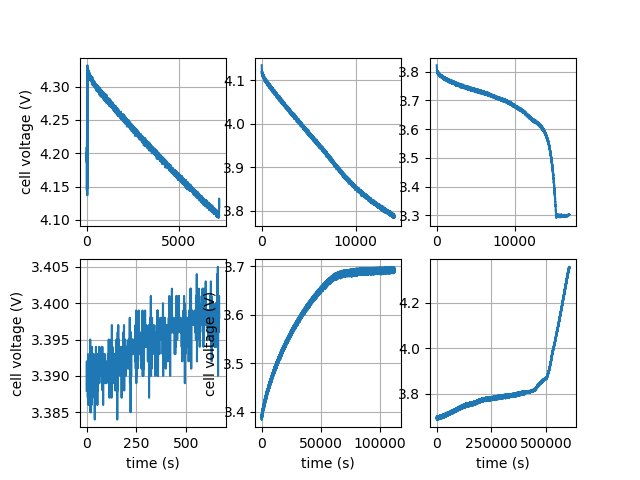

In [10]:
plt.figure()
plt.subplot(231)
seg1.vplot()
plt.ylabel('cell voltage (V)')

plt.subplot(232)
seg2.vplot()

plt.subplot(233)
seg3.vplot()

plt.subplot(234)
seg1_charge.vplot()
plt.xlabel('time (s)')
plt.ylabel('cell voltage (V)')

plt.subplot(235)
seg2_charge.vplot()
plt.xlabel('time (s)')
plt.ylabel('cell voltage (V)')

plt.subplot(236)
seg3_charge.vplot()
plt.xlabel('time (s)')
plt.show()

In [ ]:
discharge = seg1.concatenate(seg2.concatenate(seg3))

In [ ]:
charge = seg1_charge.concatenate(seg2_charge.concatenate(seg3_charge))

In [ ]:
plt.figure()
plt.subplot(221)
discharge.vplot(label='discharge')
plt.ylabel('voltage (V)')

plt.subplot(222)
charge.vplot(label='charge')

plt.subplot(223)
discharge.cplot(label='discharge')
plt.xlabel('time (s)')
plt.ylabel('current (A)')

plt.subplot(224)
charge.cplot(label='charge')

plt.xlabel('time (s)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
charge.count_charge()
discharge.count_charge()

print(f'Total discharge capacity is {round(discharge.Q/3.6,2)} mAh')
print(f'Total charge capacity is {round(charge.Q/3.6,2)} mAh')
eta = discharge.Q/charge.Q
print(eta)

In [ ]:
z1 = 1-np.cumsum(dq1)/Qdis
z2 = z1.iloc[-1]-np.cumsum(dq2)/Qdis
z = 1 - np.cumsum(dqdis)/Qdis
z_charge = 1 - np.cumsum(dq_charge)/Qcharge

In [ ]:
plt.figure()
plt.plot(stime1[1:],z1)
plt.plot(stime2[1:],z2)
plt.plot(stime[1:],z,alpha=0.7,linestyle='--')
plt.xlabel('time (s)')
plt.ylabel('state of charge (-)')
plt.title('Cell discharging curve')
plt.grid()

In [ ]:
plt.figure()
plt.plot(stime1,cell_voltage1)
plt.plot(stime2,cell_voltage2)
plt.xlabel('time (s)')
plt.ylabel(' cell voltage (V)')
plt.title('Cell voltage discharging curve')
plt.grid()

In [ ]:
plt.figure()
plt.plot(z,cell_voltage[1:],label='discharging')
plt.legend()
plt.grid()
plt.xlabel('State of Charge (-)')
plt.ylabel('Cell terminal voltage (V)')

In [ ]:
R0 = 0.0123
OCV = cell_voltage + current*R0

In [ ]:
p = np.polyfit(z,OCV[1:],11)
#p = np.polyfit(z[:-2000],OCV[:-2001],11)
print(z.iloc[-1500])

In [ ]:
plt.figure()
plt.plot(z,cell_voltage[1:],label='measured')
plt.plot(z,OCV[1:],linestyle='--',label='without R0')
plt.plot(z,np.polyval(p,z),label='polynomial')
plt.legend()
plt.grid()
plt.xlabel('State of Charge (-)')
plt.ylabel('OCV (V)')

In [ ]:
import csv 
csv_file = open('SOCvsOCV.csv','w')
writer = csv.writer(csv_file)
writer.writerow(['SOC','OCV'])
for k in range(len(z)):
    writer.writerow([z.values[k],np.polyval(p,z.values[k])])

In [ ]:
plt.figure()
plt.plot(stime_charge,z_charge)